In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Načtení a zpracování denních dat
denni_ruzyne = (
    pd.ExcelFile("data-daily.xlsx")
    .parse("Praha-Ruzyne")
    .set_index("time")
    .drop(columns=["wdir"])
    .dropna(subset=["tavg"])
)

**Otázka:** Co vrátí `denni_ruzyne_index.isna().count()`?

In [3]:
denni_ruzyne.isna().count()

tavg    23258
tmin    23258
tmax    23258
prcp    23258
snow    23258
wspd    23258
wpgt    23258
pres    23258
tsun    23258
dtype: int64

**Úkol:** Zkuste odstranit všechny řádky, pro které není definován `tsun`. Co nám to říká?

In [4]:
denni_ruzyne.dropna(subset=["tsun"])

,tavg,tmin,tmax,prcp,snow,wspd,wpgt,pres,tsun
time,,,,,,,,,
2022-08-10,19.9,13.6,25.3,0.0,NaN,9.3,22.2,1025.3,646.0
2022-08-11,19.5,12.5,24.5,0.0,NaN,10.0,29.6,1022.8,697.0
2022-08-12,19.2,12.6,25.4,0.0,NaN,13.4,33.3,1020.0,575.0
2022-08-13,19.4,13.9,24.1,NaN,NaN,11.0,29.6,1016.3,389.0
2022-08-14,21.3,17.0,27.0,1.0,NaN,7.8,22.2,1010.7,365.0
...,...,...,...,...,...,...,...,...,...
2025-08-27,18.8,12.6,27.0,0.3,NaN,9.7,24.1,1012.1,429.0
2025-08-28,21.2,15.7,30.0,7.0,NaN,12.0,47.0,1006.3,374.0
2025-08-29,18.6,15.3,23.7,17.7,NaN,10.4,27.8,1004.4,231.0


**Úkol:** Zkuste odstranit všechny řádky, pro které není definován `snow`. Co nám to říká?

In [5]:
denni_ruzyne.dropna(subset=["snow"])

,tavg,tmin,tmax,prcp,snow,wspd,wpgt,pres,tsun
time,,,,,,,,,
1973-01-16,-2.8,-4.0,-1.0,0.0,1.0,11.3,NaN,NaN,NaN
1973-01-17,-1.9,-3.0,0.0,0.0,1.0,20.3,NaN,NaN,NaN
1973-01-28,0.6,0.0,2.0,0.5,8.0,32.8,NaN,NaN,NaN
1973-02-27,-4.4,-7.0,-1.0,0.0,1.0,32.1,NaN,NaN,NaN
1974-10-19,6.6,2.0,10.0,0.0,95.0,19.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2024-01-18,-2.1,-2.9,-0.5,2.8,4.0,15.9,37.0,996.0,0.0
2024-01-20,-3.7,-5.5,-0.5,0.0,3.0,24.3,40.8,1030.9,382.0
2024-11-23,0.7,-2.3,3.4,0.0,1.0,21.9,61.0,1020.8,204.0


**Úkol:** Nejstarší tag Pandas na https://github.com/pandas-dev/pandas je verze 0.3.0 z 20. února 2011. Jaké bylo v ten den v Praze - Ruzyni počasí?

In [6]:
denni_ruzyne.loc["2011-02-20"]

tavg      -5.9
tmin      -9.5
tmax      -4.1
prcp       NaN
snow       NaN
wspd      16.3
wpgt       NaN
pres    1021.5
tsun       NaN
Name: 2011-02-20 00:00:00, dtype: float64

**Úkol:** Jaká byla průměrná teplota první (a jedinou) neděli v roce 2010, která byla zároveň začátkem měsíce? Pokud máte řešení a čas, zkuste vymyslet aternativní způsob(y). 

In [7]:
# odkomentuj a doplň
denni_ruzyne.loc[
    (denni_ruzyne.index.year == 2010)
    & (denni_ruzyne.index.day == 1)
    & (denni_ruzyne.index.day_name() == "Sunday"),
    "tavg",
]

time
2010-08-01    21.0
Name: tavg, dtype: float64

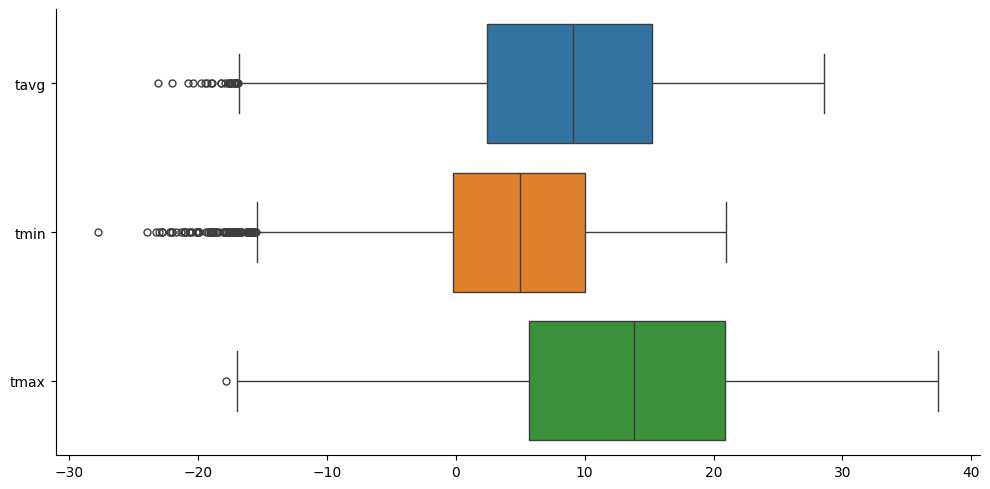

In [8]:
sns.catplot(
    data=denni_ruzyne[["tavg", "tmin", "tmax"]],
    orient="h",
    kind="box",
    aspect=2,
);

**Úkol**: Doplňte pomocné sloupce `season` a `significant_precipitation` (jistě uhádnete jakého pandas-typu budou :). První definuje roční období (jen jednoduše podle kalendářních měsíců), druhý označuje dny, kdy byly srážky vyšší než v **90 %** všech dní v našich datech (můžete zkusit i jiný limit).

1. Porovnejte numericky základní statistiky celého datasetu a podmnožiny, kdy výrazně pršelo nebo sněžilo. Zvyšují v průměru srážky teplotu? A co maximální nebo minimální? A jak je to se standardní odchylkou?
2. Použijte `sns.catplot` pro vizuální srovnání distribučních funkcí pro jednotlivá roční období a dny s málo / hodně srážkami.

In [9]:
# odkomentuj a doplň
season = denni_ruzyne.index.month.map({
    1: "zima",
    2: "zima",
    3: "jaro",
    4: "jaro",
    5: "jaro",
    6: "léto",
    7: "léto",
    8: "léto",
    9: "podzim",
    10: "podzim",
    11: "podzim",
    12: "zima"
})

significant_precipitation = denni_ruzyne["prcp"] > denni_ruzyne["prcp"].quantile(.9)
significant_precipitation

time
1940-01-02    False
1940-01-03    False
1940-01-06    False
1940-01-07    False
1940-01-12    False
              ...  
2025-08-27    False
2025-08-28     True
2025-08-29     True
2025-08-30     True
2025-08-31    False
Name: prcp, Length: 23258, dtype: bool

In [10]:
# úkol - jednoduché srovnání statistik pomocí rozdílu
(
    denni_ruzyne.loc[significant_precipitation].describe() - 
    denni_ruzyne.describe()
)

,tavg,tmin,tmax,prcp,snow,wspd,wpgt,pres,tsun
count,-21828.000000,-19381.000000,-21339.000000,-13213.000000,-995.000000,-15947.000000,-2388.000000,-10491.000000,-1017.000000
mean,2.606924,3.792539,1.817429,9.814646,0.484810,1.674077,6.581875,-4.506112,-75.870136
std,-1.809908,-1.270391,-1.873576,7.894197,-6.691121,-0.251440,1.777698,-1.355154,-47.368365
min,11.900000,7.900000,9.200000,4.700000,0.000000,2.200000,5.500000,0.000000,0.000000
25%,4.300000,4.100000,4.150000,6.100000,0.000000,2.100000,5.500000,-3.300000,-39.000000
50%,3.500000,4.650000,2.300000,8.050000,0.500000,1.700000,10.400000,-4.200000,-49.500000
75%,0.900000,2.800000,-0.400000,11.700000,2.250000,1.400000,6.200000,-5.200000,-147.750000
max,-2.200000,-2.100000,-2.400000,0.000000,-266.000000,-6.200000,-14.000000,-15.700000,-115.000000


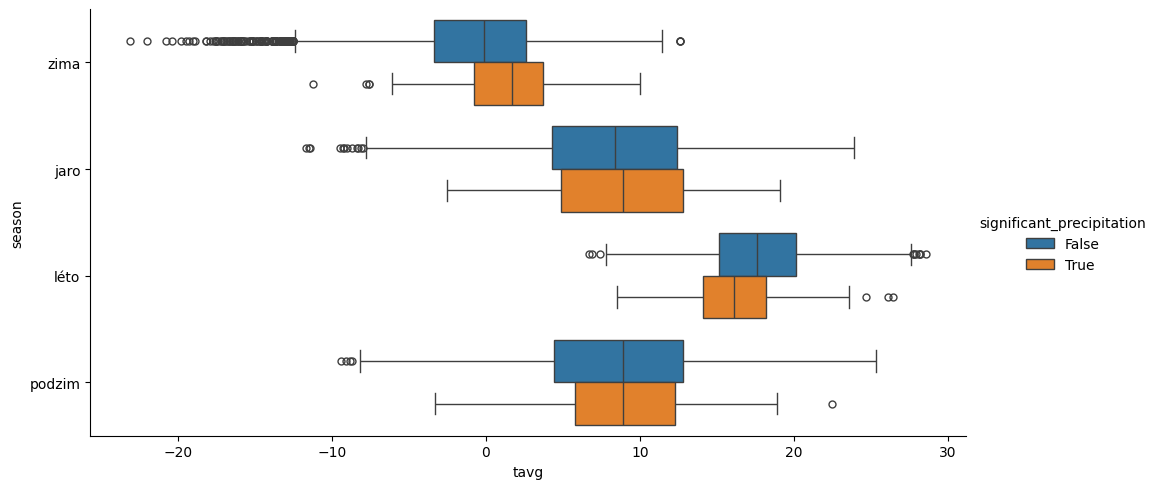

In [11]:
# úkol - vizuální srovnání statistik
sns.catplot(
     data=denni_ruzyne.assign(
        significant_precipitation=significant_precipitation,
         season=season,
     ),
    kind="box",
     aspect=2,
    hue="significant_precipitation",
     y="season",
    x="tavg",
);

Co že jsme to vlastně vytvořili?

In [12]:
rocni_ruzyne = denni_ruzyne.resample("1YE")

**Úkol:** Navrhněte vhodnou roční agregaci pro maximální teplotu (ne průměr) a vykreslete.

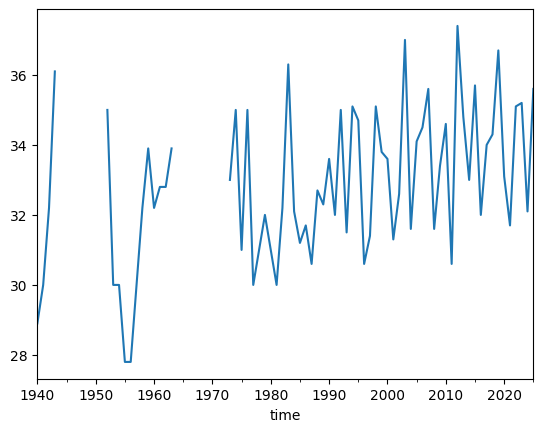

In [13]:
# odkomentuj a doplň
rocni_ruzyne["tmax"].max().plot();

**Úkol:** Najděte, kdy v období 2000-2025 napršelo nejvíc za týden (tedy za průběžných 7 dnů). Odpovídá to nějaké vaší historické zkušenosti?

In [14]:
# doplňte nebo vyřešte po svém :)
denni_ruzyne.loc["2000":"2025"]["prcp"].rolling("7D").sum().sort_values(ascending=False).iloc[:10]

time
2010-07-24    133.4
2010-07-29    105.5
2010-07-28    105.5
2010-07-25    105.0
2010-07-26    104.0
2010-07-27    104.0
2022-06-30    103.0
2022-07-01    103.0
2024-09-15     87.9
2024-09-14     87.9
Name: prcp, dtype: float64

**Nepovinný úkol:** Rozšiřte hledání na celé období v naší datové sadě - jsou některé hodnoty realistické?

In [15]:
denni_ruzyne["prcp"].rolling("7D").sum().sort_values(ascending=False).iloc[:10]

time
1980-05-31    324.1
1980-06-02    324.1
1980-06-01    324.1
1980-05-30    324.1
1980-05-29    323.6
1980-06-03    318.5
1980-05-28    307.1
1979-07-31    267.4
1979-08-01    267.4
1979-08-02    264.4
Name: prcp, dtype: float64

In [16]:
hodinove_ruzyne = (
    pd.read_parquet("praha-meteostat.parquet")
    .assign(
        time=lambda df: df["time"].dt.tz_localize("UTC").dt.tz_convert("Europe/Prague")
    )
    .set_index("time")
)

**Úkol:** Jak silný foukal vítr (jak moc pršelo) v kterou hodinu den tvého narození?

In [17]:
hodinove_ruzyne.loc["2000-01-01", "wspd"]

time
2000-01-01 00:00:00+01:00     3.6
2000-01-01 01:00:00+01:00     3.6
2000-01-01 02:00:00+01:00     3.6
2000-01-01 03:00:00+01:00     3.6
2000-01-01 04:00:00+01:00     7.2
2000-01-01 05:00:00+01:00     7.2
2000-01-01 06:00:00+01:00     3.6
2000-01-01 07:00:00+01:00     3.6
2000-01-01 08:00:00+01:00     7.2
2000-01-01 09:00:00+01:00    14.4
2000-01-01 10:00:00+01:00    14.4
2000-01-01 11:00:00+01:00    18.0
2000-01-01 12:00:00+01:00    14.4
2000-01-01 13:00:00+01:00    18.0
2000-01-01 14:00:00+01:00    18.0
2000-01-01 15:00:00+01:00    14.4
2000-01-01 16:00:00+01:00    14.4
2000-01-01 17:00:00+01:00    10.8
2000-01-01 18:00:00+01:00    18.0
2000-01-01 19:00:00+01:00    14.4
2000-01-01 20:00:00+01:00    14.4
2000-01-01 21:00:00+01:00    14.4
2000-01-01 22:00:00+01:00    10.8
2000-01-01 23:00:00+01:00    14.4
Name: wspd, dtype: Float64